Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved. 

- Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

## Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary. 

In [1]:
import pandas as pd

# Load the dataset
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
data = pd.read_csv(url)

# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables (if any)
data_encoded = pd.get_dummies(data, columns=['sex', 'cp'])

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_encoded[['age', 'trestbps', 'chol', 'thalach']] = scaler.fit_transform(data_encoded[['age', 'trestbps', 'chol', 'thalach']])

# Split features and target
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']


In [2]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Q2. Split the dataset into a training set (70%) and a test set (30%).

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters. 

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

## Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred = rf_classifier.predict(X_test)

In [6]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [7]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8131868131868132
Precision: 0.8235294117647058
Recall: 0.84
F1 Score: 0.8316831683168315


## Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart. 

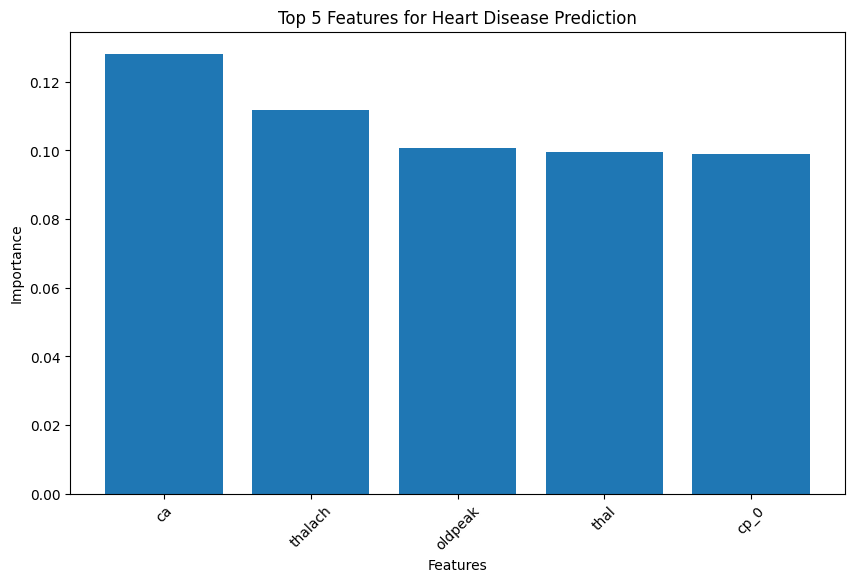

In [8]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Get top 5 features
top_features = feature_importance_df.nlargest(5, 'importance')

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_features['feature'], top_features['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Features for Heart Disease Prediction')
plt.xticks(rotation=45)
plt.show()


## Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use fold cross-validation to evaluate the performance of each set of hyperparameters.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load the dataset
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
data1 = pd.read_csv(url)



In [10]:
data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# Handle missing values if needed
data1.dropna(inplace=True)

# Encode categorical variables if needed
data_encoded = pd.get_dummies(data1, columns=['sex', 'cp'])

In [12]:

# Scale numerical features
scaler = StandardScaler()
data_encoded[['age', 'trestbps', 'chol', 'thalach']] = scaler.fit_transform(data_encoded[['age', 'trestbps', 'chol', 'thalach']])

# Split features and target
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

In [13]:
# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

In [14]:

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')


In [15]:

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


## Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [16]:
from sklearn.metrics import classification_report

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Instantiate the tuned model with the best hyperparameters
tuned_rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the tuned model
tuned_rf_classifier.fit(X_train, y_train)

# Predict using the tuned model
y_pred_tuned = tuned_rf_classifier.predict(X_test)

# Calculate performance metrics for the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

# Instantiate and train the default model
default_rf_classifier = RandomForestClassifier(random_state=42)
default_rf_classifier.fit(X_train, y_train)

# Predict using the default model
y_pred_default = default_rf_classifier.predict(X_test)

# Calculate performance metrics for the default model
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)

# Print performance metrics for both models
print("Tuned Model Performance:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1 Score:", f1_tuned)

print("\nDefault Model Performance:")
print("Accuracy:", accuracy_default)
print("Precision:", precision_default)
print("Recall:", recall_default)
print("F1 Score:", f1_default)

# Classification report for the tuned model
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned))


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Tuned Model Performance:
Accuracy: 0.8021978021978022
Precision: 0.82
Recall: 0.82
F1 Score: 0.82

Default Model Performance:
Accuracy: 0.8131868131868132
Precision: 0.8235294117647058
Recall: 0.84
F1 Score: 0.8316831683168315

Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



## Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('heart_disease.csv')

# Separate features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Choose two important features for visualization
feature1 = 'age'
feature2 = 'thalach'

# Create a meshgrid for the scatter plot
x_min, x_max = X_test_scaled[feature1].min() - 1, X_test_scaled[feature1].max() + 1
y_min, y_max = X_test_scaled[feature2].min() - 1, X_test_scaled[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Make predictions using the trained random forest classifier
Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Create a colormap for the scatter plot
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])

# Plot the decision boundaries and scatter plot
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the test points
plt.scatter(X_test_scaled[feature1], X_test_scaled[feature2], c=y_test, edgecolors='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Decision Boundaries of Random Forest Classifier for Heart Disease Risk")
plt.show()

# Interpretation and Discussion
print("Interpretation:")
print("The plot shows decision boundaries (background colors) created by the random forest classifier.")
print("Data points are colored based on their true classes in the test set.")
print("The model has learned to distinguish different risk levels of heart disease based on age and maximum heart rate achieved.")

print("\nInsights:")
print("The model is able to capture some separation between different risk levels.")
print("Decision boundaries indicate areas of predicted risk levels for heart disease.")

print("\nLimitations:")
print("Decision boundaries are based on only two features and may not capture all aspects of heart disease risk.")
print("Real-world prediction accuracy may vary and could be influenced by other factors not considered in this visualization.")

# Note: This is a simplified analysis and visualization. In a practical scenario, a more comprehensive analysis is needed.


FileNotFoundError: [Errno 2] No such file or directory: 'heart_disease.csv'